In [1]:
%matplotlib inline
import os
os.chdir("..")
os.getcwd()

'/home/twoaday/research/deep-learning/visual-fashion-item-search'

In [2]:
import glob

import pandas as pd
from tqdm import tqdm_notebook

import logging
from commons.config import MVC_INFO_PATH, MVC_IMAGES_FOLDER

2019-09-08 11:39:10,992 : INFO : Checking directories...
2019-09-08 11:39:10,993 : INFO : Directories are set.


In [3]:
data_set = []
df_mvc_info = pd.read_json(MVC_INFO_PATH)
product_ids = df_mvc_info.productId.unique().tolist()
logging.info('Found {0} products'.format(len(product_ids)))
available_image_list = glob.glob("{0}*.jpg".format(MVC_IMAGES_FOLDER))
available_image_list = [x.split('/')[-1] for x in tqdm_notebook(available_image_list,
                                                    desc='Parsing available image files')]

2019-09-08 11:39:12,993 : INFO : Found 23193 products


In [4]:
df_mvc_info.count()

brandId                 161260
brandName               161260
catNum                  161260
category                161260
colourId                161260
colourName              161260
image_4x_height         161260
image_4x_width          161260
image_url_2x            161260
image_url_4x            161260
image_url_multiView     161260
image_url_thumbnails    161260
price                   161260
productGender           161260
productId               161260
productName             161260
productTypeId           161260
styleId                 161260
subCategory1            161260
subCategory2            161260
total_style             161260
viewId                  161260
zetaCategory            161260
dtype: int64

In [5]:
len(available_image_list)

156274

In [6]:
available_image_list[0]

'3447672-3-2x.jpg'

In [7]:
df_data_set = []
available_image_list = set(available_image_list)
for _, row in tqdm_notebook(df_mvc_info.iterrows(), desc='Parsing files', total=len(df_mvc_info)):
    file_name = row['image_url_2x'].split('/')[-1]
    if file_name in available_image_list:
        df_data_set.append([file_name,
                            'mvc_' + row['productName'], 
                            row['subCategory2'],
                            MVC_IMAGES_FOLDER + file_name])
df_data_set = pd.DataFrame(df_data_set)
df_data_set.columns = ['name', 'product', 'category', 'file']
df_data_set.head()

,name,product,category,file
0,3163710-p-2x.jpg,"mvc_""Apex Bionic Jacket""","""Jackets and Coats""",/run/media/twoaday/data-storag/data-sets/multi...
1,3163710-1-2x.jpg,"mvc_""Apex Bionic Jacket""","""Jackets and Coats""",/run/media/twoaday/data-storag/data-sets/multi...
2,3163710-2-2x.jpg,"mvc_""Apex Bionic Jacket""","""Jackets and Coats""",/run/media/twoaday/data-storag/data-sets/multi...
3,3163710-3-2x.jpg,"mvc_""Apex Bionic Jacket""","""Jackets and Coats""",/run/media/twoaday/data-storag/data-sets/multi...
4,3163710-4-2x.jpg,"mvc_""Apex Bionic Jacket""","""Jackets and Coats""",/run/media/twoaday/data-storag/data-sets/multi...


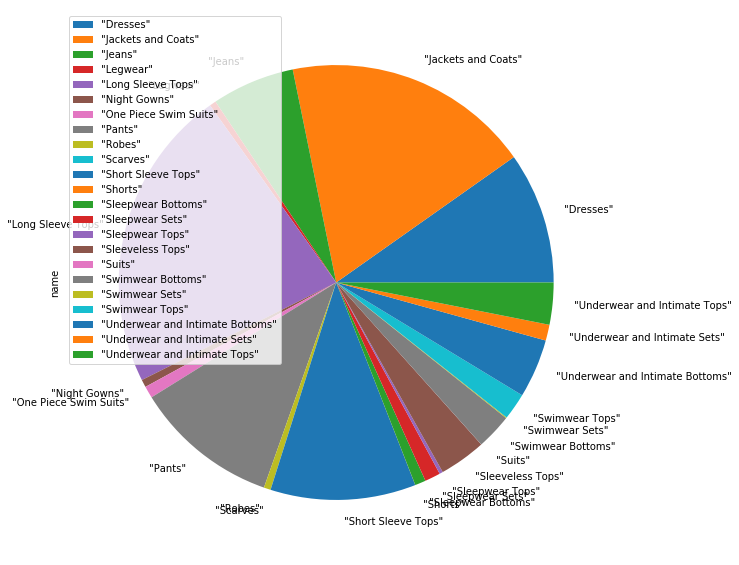

In [8]:
df_data_set.groupby('category').count().plot.pie('name', figsize=(10, 10))

In [9]:
df_data_set.count()

name        156326
product     156326
category    156326
file        156326
dtype: int64

In [10]:
df_data_set.groupby('product').count().name.count()

22267

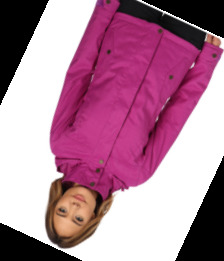

In [95]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from PIL import ImageOps
from torchvision import transforms

import numpy as np
import torch

data_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation((-45, 45), resample=Image.BILINEAR),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(), 
    transforms.ToPILImage()
])
img = Image.open(df_data_set.file.sample(1).values[0])
data_transform(img)

In [100]:
test_df = pd.DataFrame([1,2,3,4,5])
test_df._slice(1)

ValueError: Only same dim slicing is allowed